In [25]:
import pandas as pd
df=pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [26]:
df.shape

(29531, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [28]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [29]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [30]:
#Handling missing values

pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']  # List of pollutant columns

# Fill missing numeric values with median (better than mean for skewed data)
for col in pollutants:
    df[col] = df[col].fillna(df[col].median())

# Fill AQI missing values with median too
df['AQI'] = df['AQI'].fillna(df['AQI'].median())

# Drop rows where AQI_Bucket is missing (category column)
df = df.dropna(subset=['AQI_Bucket'])


In [31]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [32]:
#Feature engineering (extracting year, month, day)

df['Date'] = pd.to_datetime(df['Date']) # Convert Date column to datetime

# Extract extra features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

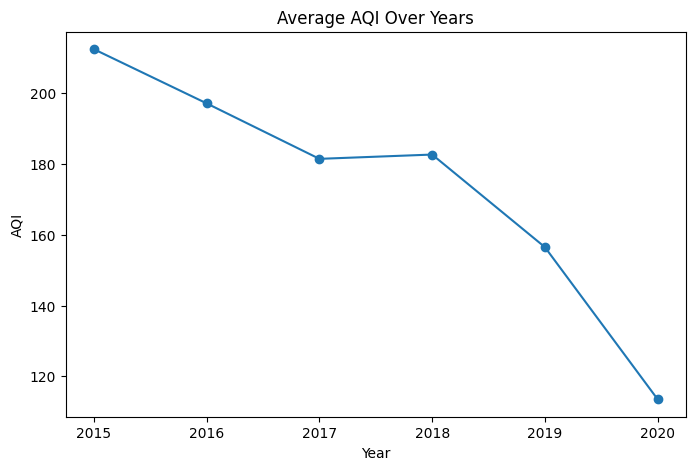

In [33]:
#visualizations
import matplotlib.pyplot as plt

# Average AQI by year
yearly_aqi = df.groupby("Year")["AQI"].mean()

plt.figure(figsize=(8,5))
yearly_aqi.plot(marker='o')
plt.title("Average AQI Over Years")
plt.xlabel("Year")
plt.ylabel("AQI")
plt.show()

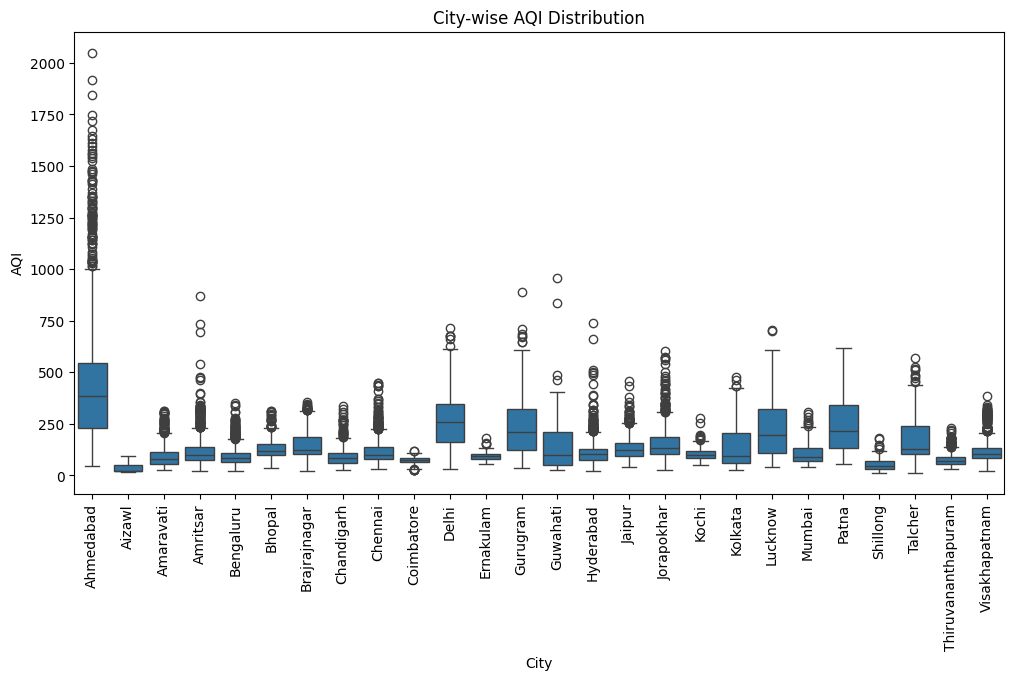

In [34]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="City", y="AQI", data=df)
plt.xticks(rotation=90)
plt.title("City-wise AQI Distribution")
plt.show()

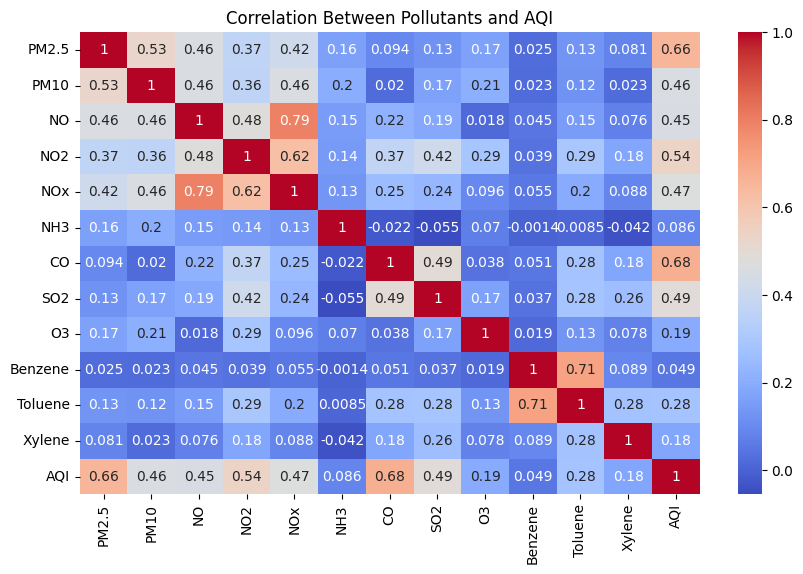

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df[pollutants + ["AQI"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants and AQI")
plt.show()

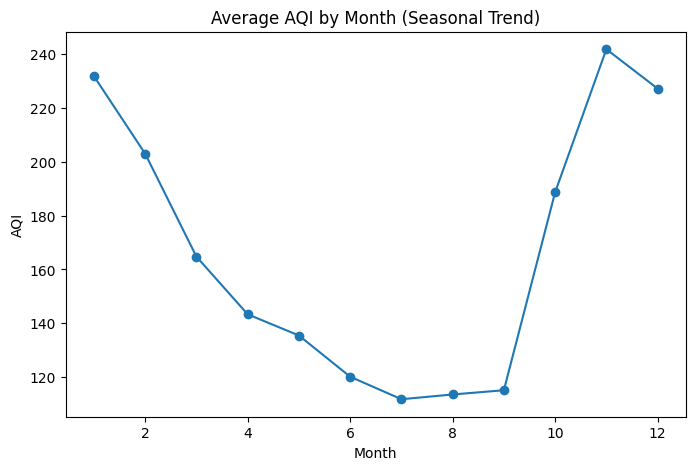

In [36]:
monthly_aqi = df.groupby("Month")["AQI"].mean()

plt.figure(figsize=(8,5))
monthly_aqi.plot(marker='o')
plt.title("Average AQI by Month (Seasonal Trend)")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.show()

In [37]:
#Encoding categorical features
from sklearn.preprocessing import LabelEncoder

df['AQI_Bucket'] = LabelEncoder().fit_transform(df['AQI_Bucket'])

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[pollutants] = scaler.fit_transform(df[pollutants])

In [39]:
# Modeling (AQI_Bucket Classification)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Define Features (X) and Target (y)

X = df.drop(columns=['AQI_Bucket', 'AQI', 'City', 'Date'])  # Drop target and non-numeric
y = df['AQI_Bucket']  # Target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Split Train/Test

In [42]:
#Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = model.predict(X_test)

In [44]:
#Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.8162977867203219

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.64      0.72       268
           1       0.82      0.86      0.84      1766
           2       0.76      0.67      0.71       556
           3       0.84      0.85      0.84      1645
           4       0.87      0.80      0.83       268
           5       0.78      0.81      0.79       467

    accuracy                           0.82      4970
   macro avg       0.81      0.77      0.79      4970
weighted avg       0.82      0.82      0.81      4970



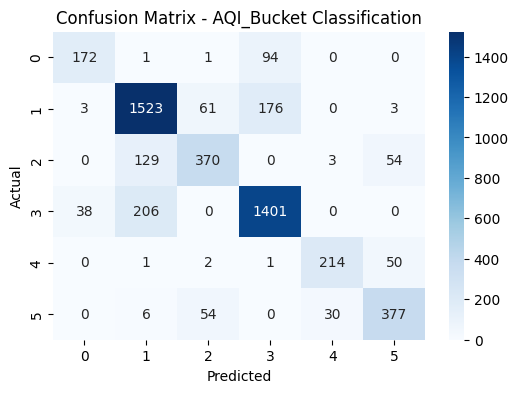

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AQI_Bucket Classification")
plt.show()